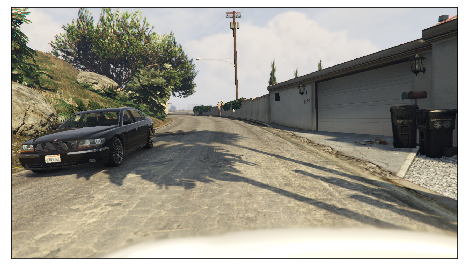

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{max-width:80%!important;width:auto!important;}</style>"))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%reload_ext autoreload
%autoreload 2
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

from tqdm.notebook import tqdm, trange

import sys
sys.path.append('../')

from depth_Functions import (
    show_img,
    show_array_of_images,
    show_function,
    import_raw_colour_image
)

from Feature_Extraction import (
    mask,
    texture_variation,
    haze,
    create_kernels,
    denoise,
    texture_gradients,
    get_thresholds,
    filters,
    create_local_feature_vector,
    get_feature_vector
)

from Feature_Patches import Patches

bgr = import_raw_colour_image('../GTA_images/Simple/Colour/color_1.raw')
show_img(bgr);

# Scales

In [1]:
show_function(Patches.__init__)

NameError: name 'show_function' is not defined

In [5]:
patch = Patches(bgr, function=get_feature_vector, convert=cv2.COLOR_BGR2YCrCb)

In [28]:
from scipy.ndimage import uniform_filter

test = uniform_filter(patch.features, size=3)[::3,::3]

In [110]:
def average(image, nxm):
    total = nxm[0]*nxm[1]
    kernel = np.array([[1/total for i in range(nxm[0])] for i in range(nxm[1])])
    return cv2.filter2D(image, -1, kernel)[::nxm[0],::nxm[1]]

In [118]:
test = np.mean(patch.features.reshape((2,2,720//2,1280//2,17)),axis=(0,1))

In [141]:
test=average(patch.features,(2,2))

In [137]:
reference = np.zeros(test.shape)

In [138]:
heights = [y for y in range(0,patch.features.shape[0],2)]+[bgr.shape[0]]
widths  = [x for x in range(0,patch.features.shape[1],2)]+[bgr.shape[1]]

for x, (x0,x1) in tqdm(enumerate(zip(widths[:-1], widths[1:])), 
                       total=len(widths)-1, leave=False):
        for y, (y0,y1) in enumerate(zip(heights[:-1], heights[1:])):
                reference[y, x,:] = np.mean(patch.features[y0:y1, x0:x1], axis=(0,1))

In [143]:
np.all(test == reference)

/opt/conda/envs/bul7cv/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [147]:
test[0][0]
reference[0][0]

array([-0.66147047, -0.55339034, -0.67227848, -0.66301447, -0.53331832,
       -0.57809437, -0.66301447, -0.64448645, -0.64603045, -0.64911845,
       -0.65992647, -0.66919048,  0.11516242,  0.11516242,  0.89951531,
        0.90260331,  0.11516242])

array([-0.66147047, -0.55339034, -0.67227848, -0.66301447, -0.53331832,
       -0.57809437, -0.66301447, -0.64448645, -0.64603045, -0.64911845,
       -0.65992647, -0.66919048,  0.11516242,  0.11516242,  0.89951531,
        0.90260331,  0.11516242])

In [124]:
(patch.features[0,0] / 4)+(patch.features[0,1] / 4)+(patch.features[1,0] / 4)+(patch.features[1,1] / 4)

array([-0.66147047, -0.55339034, -0.67227848, -0.66301447, -0.53331832,
       -0.57809437, -0.66301447, -0.64448645, -0.64603045, -0.64911845,
       -0.65992647, -0.66919048,  0.11516242,  0.11516242,  0.89951531,
        0.90260331,  0.11516242])